<a href="https://colab.research.google.com/github/Dewchathu/cat_and_dog_classifier/blob/main/cat_and_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q

!pip install opendatasets -q

In [2]:
#import necessary libraries

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: chaturadevinda
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification


100%|██████████| 217M/217M [00:02<00:00, 90.0MB/s]


In [4]:
BATCH_SIZE = 32
IMAGE_SIZE = (128,128)

In [5]:
train_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/train"
test_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/test"

In [6]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size = BATCH_SIZE,
                                                         image_size = IMAGE_SIZE,
                                                         subset = 'training',
                                                         validation_split=0.1,
                                                         seed=42)

validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size = BATCH_SIZE,
                                                         image_size = IMAGE_SIZE,
                                                         subset = 'validation',
                                                         validation_split=0.1,
                                                         seed=42)
test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         batch_size = BATCH_SIZE,
                                                         image_size = IMAGE_SIZE)


Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [7]:
class_names = train_data.class_names
class_names

['cats', 'dogs']

In [8]:
for image_batch, label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


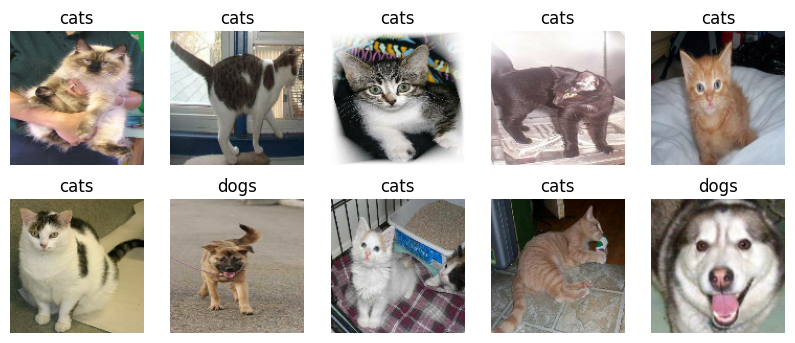

In [9]:
#plot data samples
plt.figure(figsize=(10,4))
for image, label in train_data.take(2):
  for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])
    plt.axis('off')

In [10]:
train_data = train_data.map(lambda x,y: (x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255, y))
test_data = test_data.map(lambda x,y: (x/255, y))

In [11]:
for image, label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[0.3961086  0.4078733  0.42748114]
   [0.4355866  0.44202045 0.44825512]
   [0.46131483 0.45220995 0.44154495]
   ...
   [0.5092645  0.5212284  0.5342339 ]
   [0.4975392  0.5219724  0.5321287 ]
   [0.505491   0.54506695 0.5488084 ]]

  [[0.33411878 0.3458835  0.36549133]
   [0.38969606 0.39134222 0.39917278]
   [0.44707006 0.44312912 0.43156356]
   ...
   [0.4577287  0.473415   0.4851797 ]
   [0.47034866 0.49478185 0.5049381 ]
   [0.54429597 0.57679373 0.58407426]]

  [[0.3629136  0.37216607 0.39051777]
   [0.35912177 0.36073023 0.36857337]
   [0.41327012 0.40934855 0.3990238 ]
   ...
   [0.4734801  0.49224457 0.5040093 ]
   [0.5106449  0.53025275 0.54201746]
   [0.49931952 0.52692366 0.53602296]]

  ...

  [[0.46303937 0.47872567 0.49049038]
   [0.4769317  0.49261796 0.50438267]
   [0.5119452  0.52763146 0.53939617]
   ...
   [0.3196794  0.34126672 0.3794552 ]
   [0.18020116 0.19929379 0.21234119]
   [0.35724655 0.36969173 0.3621856 ]]

  [[0.49081576 0.50650203 0.518266

In [12]:
data_augmentation = tf.keras.Sequential(
    [
    tf.keras.layers.RandomFlip("horizontal", input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    ]
)

In [13]:
model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)      

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [16]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=20,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/20
225/225 [==============================] - 18s 43ms/step - loss: 0.6693 - accuracy: 0.5924 - val_loss: 0.7129 - val_accuracy: 0.5088
Epoch 2/20
225/225 [==============================] - 10s 45ms/step - loss: 0.6497 - accuracy: 0.6146 - val_loss: 0.6308 - val_accuracy: 0.6525
Epoch 3/20
225/225 [==============================] - 9s 39ms/step - loss: 0.6194 - accuracy: 0.6585 - val_loss: 0.5962 - val_accuracy: 0.6837
Epoch 4/20
225/225 [==============================] - 9s 38ms/step - loss: 0.6114 - accuracy: 0.6653 - val_loss: 0.7712 - val_accuracy: 0.6463
Epoch 5/20
225/225 [==============================] - 10s 42ms/step - loss: 0.5955 - accuracy: 0.6737 - val_loss: 0.6149 - val_accuracy: 0.6450
Epoch 6/20
225/225 [==============================] - 10s 44ms/step - loss: 0.5933 - accuracy: 0.6812 - val_loss: 0.6053 - val_accuracy: 0.6538
Epoch 7/20
225/225 [==============================] - 10s 45ms/step - loss: 0.5705 - accuracy: 0.6942 - val_loss: 0.7755 - val_accuracy: 0

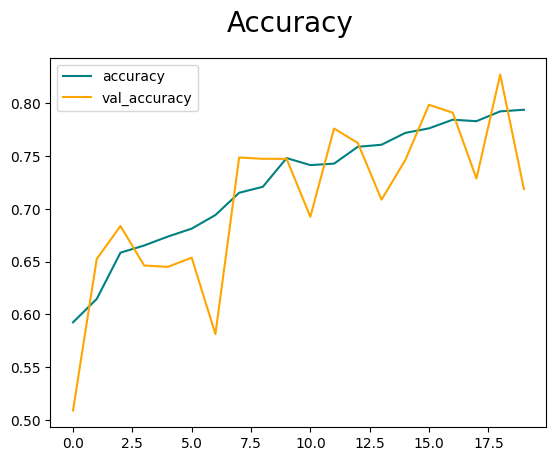

In [17]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

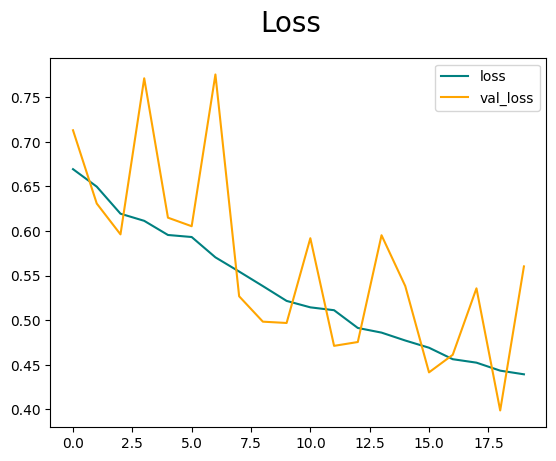

In [19]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

In [23]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.metrics.BinaryAccuracy()

In [24]:
for batch in test_data.as_numpy_iterator():
  X,Y = batch
  yhat = model.predict(X)
  precision.update_state(Y, yhat)
  recall.update_state(Y,yhat)
  accuracy.update_state(Y,yhat)

1/1 [==============================] - 0s 352ms/step


In [26]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.64134157>

In [29]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.937>

In [30]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7065>

In [31]:
model.save('.')

In [33]:
!pip install opencv-python

In [34]:
import cv2

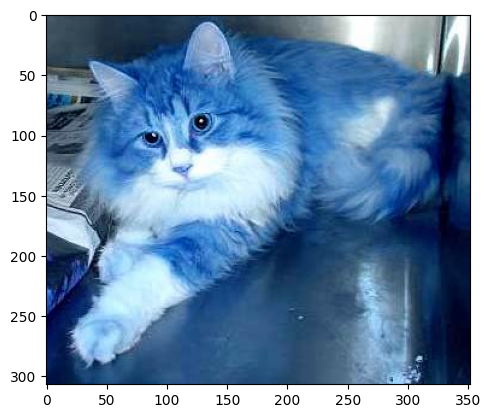

In [49]:
image = cv2.imread('/content/cats-and-dogs-for-classification/cats_dogs/test/cats/cat.4052.jpg')
plt.imshow(image)
plt.show()

In [50]:
resized_image = tf.image.resize(image, IMAGE_SIZE)
scaled_image = resized_image/255

In [51]:
np.expand_dims(scaled_image, 0).shape

(1, 128, 128, 3)

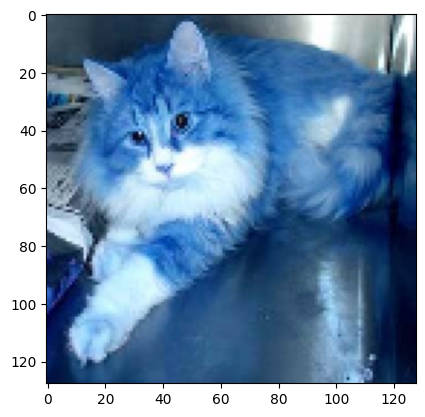

In [52]:
plt.imshow(scaled_image)
plt.show()

In [53]:
y_hat = model.predict(np.expand_dims(scaled_image, 0))

1/1 [==============================] - 0s 18ms/step


In [54]:
y_hat


array([[0.30777556]], dtype=float32)

In [55]:
if y_hat >= 0.5:
  print(class_names[1])
else:
  print(class_names[0])

cats
